In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tqdm import trange
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#data.csv from https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
df_NYC_dataset = pd.read_csv('data.csv') 

# How many incidents were opened in each year (beginning with 2010)?

We noticed ```Created Date``` is not a ```datetime``` object, however convert entire dataset column to ```datetime``` will be computationally expensive <br>
Here since they all have the same format, I used a ```string``` search method and a hash table to store the result.

In [3]:
df_NYC_dataset['Created Date'].dtypes

dtype('O')

100%|█████████████████████████████████████████| 28866465/28866465 [01:34<00:00, 304019.97it/s]

In Year 2010,  2031813 of incidents were opened
In Year 2011,  1961598 of incidents were opened
In Year 2012,  1796169 of incidents were opened
In Year 2013,  1839970 of incidents were opened
In Year 2014,  2113991 of incidents were opened
In Year 2015,  2300742 of incidents were opened
In Year 2016,  2391347 of incidents were opened
In Year 2017,  2492077 of incidents were opened
In Year 2018,  2748310 of incidents were opened
In Year 2019,  2395172 of incidents were opened
In Year 2020,  2593410 of incidents were opened
In Year 2021,  2761598 of incidents were opened
In Year 2022,  1440268 of incidents were opened


<BarContainer object of 13 artists>

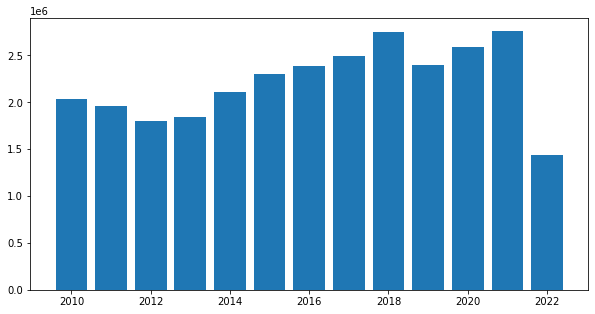

In [4]:
import collections

time = df_NYC_dataset["Created Date"]
result = {}
for i in trange(time.shape[0]):
    if int(time[i][6:10]) in result:
        result[int(time[i][6:10])] += 1
    else:
        result[int(time[i][6:10])] = 1

result = collections.OrderedDict(sorted(result.items()))
for year, num in result.items():
    print(f'In Year {year},  {num} of incidents were opened')

year = list(result.keys())
count = list(result.values())
fig = plt.figure(figsize=(10,5))
plt.bar(year,count)

# Which Borough has the most incidents?

from the data we can see ```Brooklyn``` has the most incidents open with 8512622 tickets

BROOKLYN         8512622
QUEENS           6614303
MANHATTAN        5693221
BRONX            5367316
STATEN ISLAND    1399974
Unspecified      1234071
Name: Borough, dtype: int64


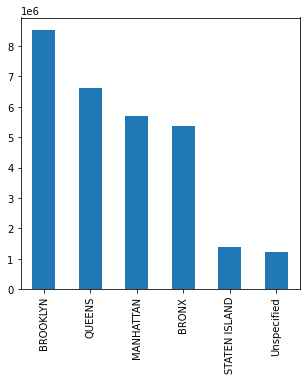

In [5]:
borough_incidents = df_NYC_dataset['Borough'].value_counts().sort_values(ascending=False)
print(borough_incidents)
borough_incidents.plot.bar(figsize=(5, 5))
plt.show()

# Additional analysis

Majority of the ticket is closed

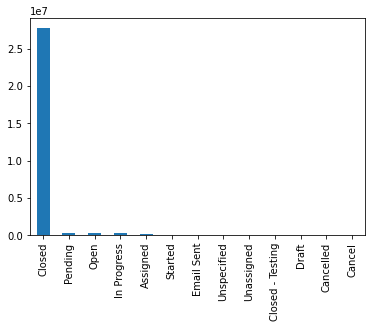

In [6]:
df_NYC_dataset['Status'].value_counts().plot(kind='bar')
plt.show()

Here are the top 10 most complaint types

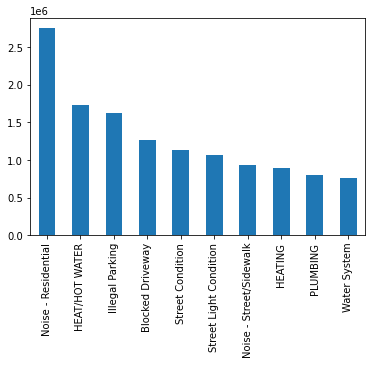

In [7]:
df_NYC_dataset['Complaint Type'].value_counts().nlargest(10).plot(kind='bar')
plt.show()

Next we can try to visulize the location of the most complaint type, since the dataset is really large we can subsample it for ploting

In [8]:
df_samp = df_NYC_dataset.sample(frac=0.05,random_state=1)

Here we can see the heatmap for Illegal parking

(-74.28129521708684, -73.67326874725829, 40.47844791230006, 40.93355550403173)

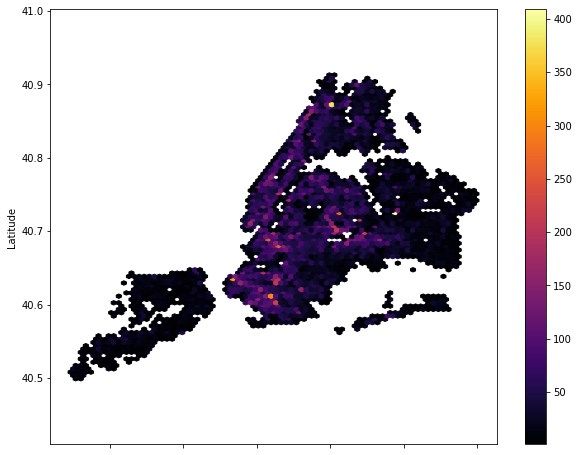

In [9]:
df_samp[df_samp['Complaint Type'] == 'Illegal Parking'].plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=80,
    colormap='inferno',mincnt=1,figsize=(10,8)).axis('equal')

We can see upper manhattan area has the most complaint about heat/hotwater 

(-74.27802870235374, -73.67552605757999, 40.48072738787223, 40.931405870834396)

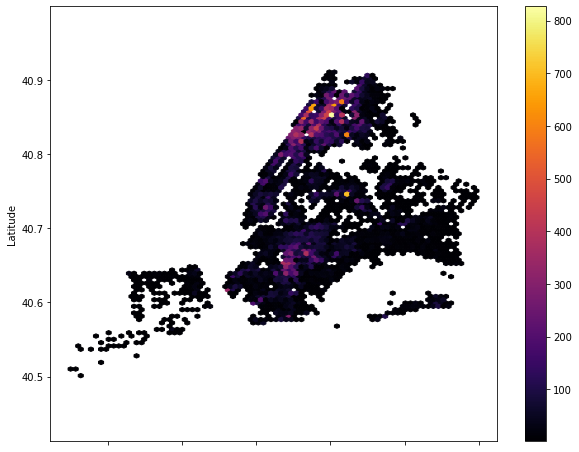

In [10]:
df_samp[df_samp['Complaint Type'] == 'HEAT/HOT WATER'].plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=80,
    colormap='inferno', mincnt=1, figsize=(10,8)).axis('equal')

Here we can see the area has the most blocked Driveways, Queens has the most frequency but it is pretty much spread out

(-74.28089361854074, -73.67385077527251, 40.48177376005245, 40.932665239422114)

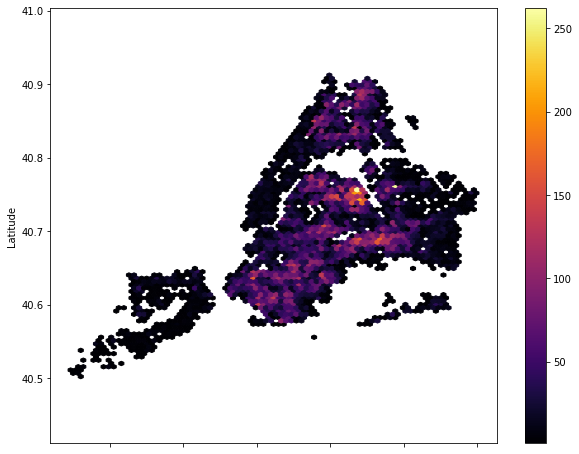

In [11]:
df_samp[df_samp['Complaint Type'] == 'Blocked Driveway'].plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=80,
    colormap='inferno', mincnt=1, figsize=(10,8)).axis('equal')

Here we can see heart of manhattan has the most complaint about street condition

(-74.2826694822132, -73.67255973347503, 40.47924994350366, 40.93347421033586)

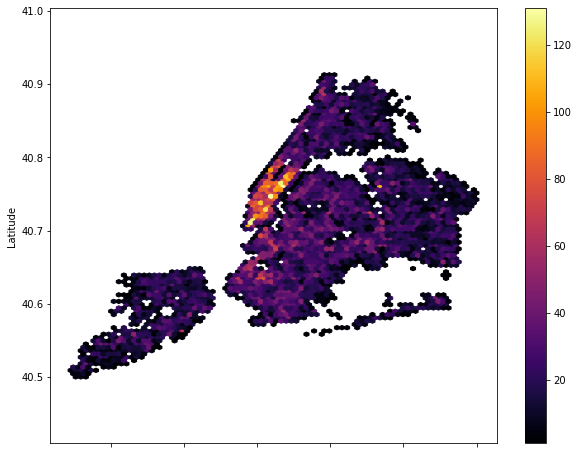

In [12]:
df_samp[df_samp['Complaint Type'] == 'Street Condition'].plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=80,
    colormap='inferno', mincnt=1, figsize=(10,8)).axis('equal')

Here we see upper manhattan has the most Nosie in street/sidewalks

(-74.27755877949696, -73.67450000597334, 40.47813725699098, 40.93315059557741)

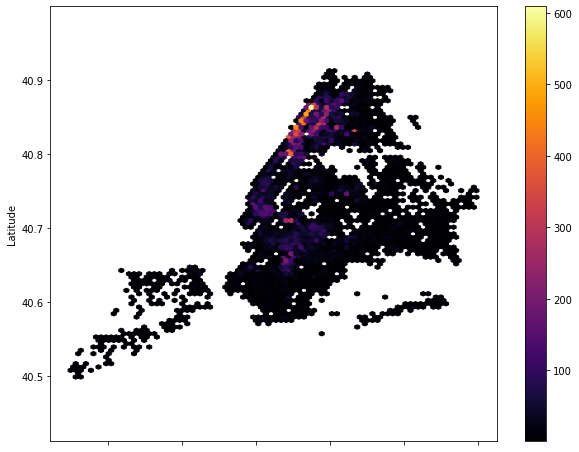

In [13]:
df_samp[df_samp['Complaint Type'] == 'Noise - Street/Sidewalk'].plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=80,
    colormap='inferno', mincnt=1, figsize=(10,8)).axis('equal')

# Task 2, Build a Data Product
Data Cleaning<br>


If we look at the Complaint Types, There are total **481** class, I decided to make all Complants has frequency less than 1% <br>
into the "Other" category

In [14]:
counts = df_NYC_dataset['Complaint Type'].value_counts()
print(counts)

mask = df_NYC_dataset['Complaint Type'].isin(counts[counts<(0.01*df_NYC_dataset.shape[0])].index) # <1% freq assign to 'other' 
df_NYC_dataset['Complaint Type'][mask]='Other'

Noise - Residential               2756406
HEAT/HOT WATER                    1734003
Illegal Parking                   1622540
Blocked Driveway                  1266004
Street Condition                  1137612
                                   ...   
Misc. Comments';declare @q ...          1
Misc. Comments'.sleep(20).'             1
Misc. Comments&gt;  BCC:bl0...          1
(select load_file('\\\\615h...          1
DOF Literature Request                  1
Name: Complaint Type, Length: 481, dtype: int64


Now there are 31 type of Complaint types for us to build a prediction model.

In [15]:
df_NYC_dataset['Complaint Type'].value_counts()

Other                                  7576532
Noise - Residential                    2756406
HEAT/HOT WATER                         1734003
Illegal Parking                        1622540
Blocked Driveway                       1266004
Street Condition                       1137612
Street Light Condition                 1064677
Noise - Street/Sidewalk                 930361
HEATING                                 887869
PLUMBING                                806214
Water System                            758939
UNSANITARY CONDITION                    611388
Noise                                   584371
General Construction/Plumbing           581335
Traffic Signal Condition                521164
GENERAL CONSTRUCTION                    500821
Noise - Commercial                      477469
PAINT/PLASTER                           430034
Sewer                                   428581
Noise - Vehicle                         417600
Dirty Conditions                        404734
Damaged Tree 

We do notice the **unbalanced** group among the complaint type, this issue will be addressed later by subsample

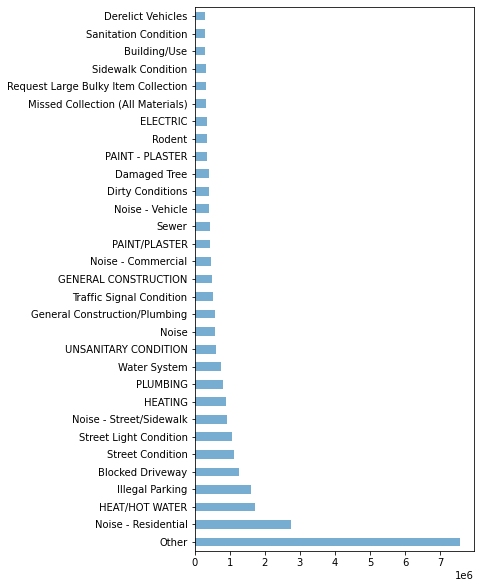

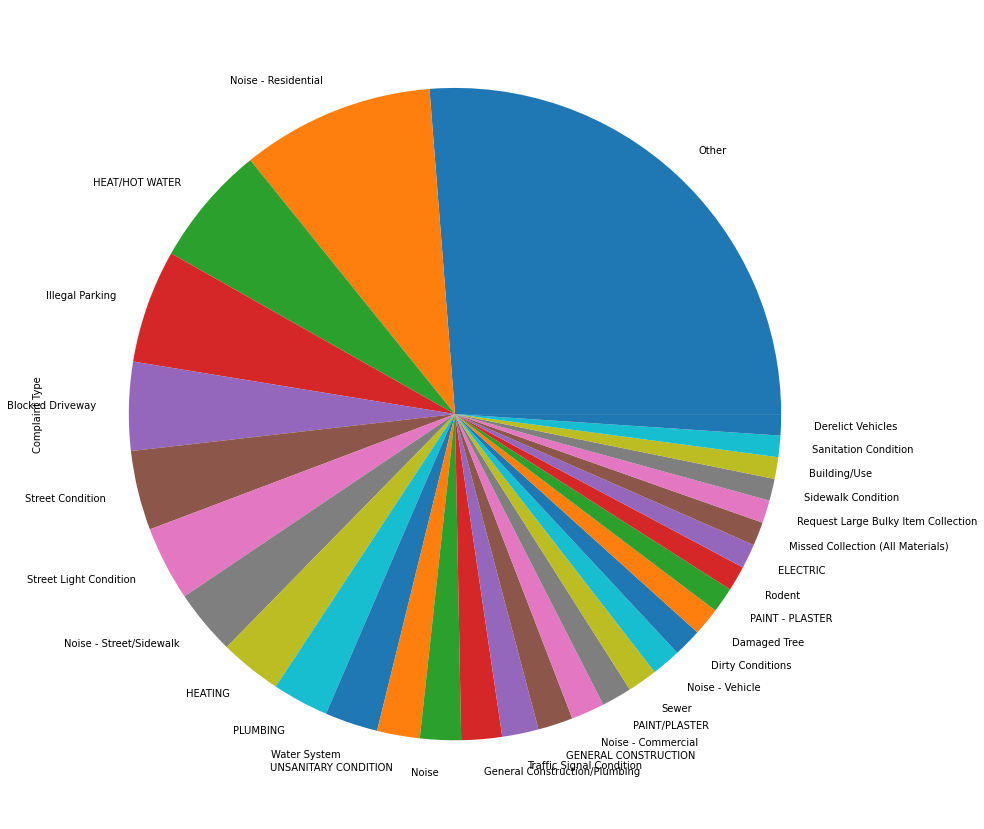

In [16]:
df_NYC_dataset['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6,figsize=(5,10))
plt.show()
df_NYC_dataset['Complaint Type'].value_counts().plot.pie(figsize=(15, 15))
plt.show()

## Feature selection

In [17]:
null = df_NYC_dataset.isnull().sum().sort_values(ascending=False)

In [18]:
null_count = null.copy()
for name, val in null_count.items():
    null_count[name] = str((val/28866465)*100) + '%'
print(null_count)

Vehicle Type                         99.96553440125072%
Taxi Company Borough                 99.92054794378183%
Road Ramp                            99.76551683761762%
Bridge Highway Direction             99.73131798438084%
Bridge Highway Name                  99.66180479667324%
Bridge Highway Segment               99.65100679975882%
Taxi Pick Up Location                99.22238486770028%
Landmark                             83.90725362457786%
Facility Type                        80.85983164201089%
Intersection Street 2                70.40195257715138%
Intersection Street 1                70.38261525961008%
Due Date                             69.93124721021434%
Cross Street 2                      31.590435475906038%
Cross Street 1                      31.176120803153417%
Location Type                       23.004451705465147%
BBL                                 22.621103761752607%
Street Name                         15.688349785815477%
Incident Address                    15.682630346

# Feature to drop by selection

- ```Cross Street 1,2``` High Null value and potential duplicated with X,Y coordinate and ZipCode
- ```BBL``` Potential duplicated information with Borough and ZipCode
- ```Street Name ``` Potential duplicated information with X,Y coordinate and ZipCode
- ```Location```Potential duplicated information with X,Y coordinate and ZipCode
- ```Incident Address ```Potential duplicated information with X,Y coordinate and ZipCode
- ```Latitude,Longitude  ```Potential duplicated information with X,Y coordinate and ZipCode
- ```Closed Date``` ```Created Date```less important feature compared to others
- ```Resolution Action Updated Date```less important feature compared to others
- ```Community Board``` duplicated infomration with City, Zip code etc
- ```Park Facility Name``` 90% are Unspecified information
- ```Agency Name```duplicated with Agency
- ```Status```90%+ in single category

Here we first remove all the column has more than 50% ``null`` values in them

In [19]:
#remove more than 50% null value
remove_most_null = []
for name, val in null.items():
    if val/28866465 >= 0.5:
        remove_most_null.append(name)

#more things to drop
drop = ['Cross Street 2','Cross Street 1','BBL',
        'Street Name','Park Facility Name','Park Borough',
        'Incident Address','Resolution Action Updated Date',
        'Open Data Channel Type','Community Board','Longitude','Latitude','Status','Unique Key','Location','Closed Date','Agency Name']

df_NYC_dataset = df_NYC_dataset.drop(columns=drop)
df_NYC_dataset = df_NYC_dataset.drop(columns=remove_most_null)

I choose to filter the```Descriptor```, ```City```,```Resolution Description```,```Agency```,```Incident Zip``` column with the same filtering method, mark anything less that 0.5% frequency into the 'Other' class

In [20]:
counts = df_NYC_dataset['Descriptor'].value_counts()
mask = df_NYC_dataset['Descriptor'].isin(counts[counts<(0.005*df_NYC_dataset.shape[0])].index)
df_NYC_dataset['Descriptor'][mask] = 'Other'

counts = df_NYC_dataset['City'].value_counts()
mask = df_NYC_dataset['City'].isin(counts[counts<(0.005*df_NYC_dataset.shape[0])].index)
df_NYC_dataset['City'][mask]='Other'

counts = df_NYC_dataset['Resolution Description'].value_counts()
mask = df_NYC_dataset['Resolution Description'].isin(counts[counts<(0.005*df_NYC_dataset.shape[0])].index)
df_NYC_dataset['Resolution Description'][mask] = 'Other'

counts  = df_NYC_dataset['Agency'].value_counts()
mask = df_NYC_dataset['Agency'].isin(counts[counts<(0.005*df_NYC_dataset.shape[0])].index)
df_NYC_dataset['Agency'][mask]='Other'
df_NYC_dataset['Agency'].value_counts()

counts = df_NYC_dataset['Incident Zip'].value_counts()
mask = df_NYC_dataset['Incident Zip'].isin(counts[counts<(0.005*df_NYC_dataset.shape[0])].index)
df_NYC_dataset['Incident Zip'][mask] = 'Other'

counts = df_NYC_dataset['Location Type'].value_counts()
mask = df_NYC_dataset['Location Type'].isin(counts[counts<(0.005*df_NYC_dataset.shape[0])].index)
df_NYC_dataset['Location Type'][mask] = 'Other'


df_NYC_dataset['Location Type'].fillna('empty', inplace =True)
df_NYC_dataset['Incident Zip'].fillna('empty', inplace =True)
df_NYC_dataset['Descriptor'].fillna('empty', inplace =True)
df_NYC_dataset['Address Type'].fillna('empty', inplace =True)
df_NYC_dataset['City'].fillna('empty', inplace =True)
df_NYC_dataset['Incident Zip'].fillna('empty', inplace =True)
df_NYC_dataset['Resolution Description'].fillna('empty', inplace =True)
df_NYC_dataset['Borough'].fillna('empty', inplace =True)
df_NYC_dataset['City'].fillna('empty', inplace =True)
df_NYC_dataset['Incident Zip'] = df_NYC_dataset['Incident Zip'].astype(str)

## Building a Generalized Predictive Model (all years)

In [21]:
from sklearn.preprocessing import LabelEncoder

df = df_NYC_dataset

#here we fill the missing X,Y coordiante with the average.
fill_x = df['X Coordinate (State Plane)'].mean()
fill_y = df['Y Coordinate (State Plane)'].mean()
df['X Coordinate (State Plane)'].fillna(fill_x,inplace=True)
df['Y Coordinate (State Plane)'].fillna(fill_y,inplace=True)

#building the label column
le = LabelEncoder()
label = le.fit_transform(df['Complaint Type'])
df['label'] = label

#ground truth label
label_name  = list(le.classes_)

df = df.drop(columns=['Complaint Type','Created Date'])

Here we subsample each prediction class with 5000 example to build a perfect balanced dataset for training

In [22]:
df_sub = df.groupby('label', group_keys=False).apply(lambda x: x.sample(5000))

Reason using One Hot Encoding to encode our categorical feature <br>
Our categorical feature is not ordinal <br>
Since for our model we will use ```Decision trees``` and by nature it is immune to multi-collinearity problem often found One Hot Encoding data<br>
Downside of One Hot Encoding is dimension of the data can grow very large <br>
Other ideas are Frequency Encoding with features has very distinct frequencies. <br>
<br>
<br>
Other ideas can be applied after One Hot Encoding is dimision reduction, however since ```PCA``` is designed for continuous variables, it won't work well here.
Some idea to try can be ```MCA``` in the future.


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
scaler = StandardScaler()
X = df_sub#.drop(columns=['Incident Zip'])
X[['X Coordinate (State Plane)', 'Y Coordinate (State Plane)']] = StandardScaler().fit_transform(df_sub[['X Coordinate (State Plane)', 'Y Coordinate (State Plane)']])

from sklearn.compose import make_column_transformer
column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False),['Agency','Descriptor','Incident Zip','Location Type','Address Type','City','Resolution Description','Borough']),remainder='passthrough')

X_one_hot = column_transformer.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
np.random. shuffle(X_one_hot)
data_train = X_one_hot[:,:-2].astype('float32')
data_label = X_one_hot[:,-1].astype('float32')

train, test, train_label, test_label = train_test_split(data_train, data_label, test_size=0.05, random_state=42)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb

#I used RandomizedSearchCV to finetune the params for my xgb_model
xgb_model = xgb.XGBClassifier(n_estimators=300,num_class=len(label_name),learning_rate=0.01,
                             min_child_weight = 1,gamma=1,subsample=0.6,colsample_bytree=0.4,max_depth=10)
xgb_model.fit(train,train_label)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_class=31, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

In [26]:
test_pred = xgb_model.predict(test)

# Performance Result

Here in our **31 classs** prediction model we did fairly good in general. <br>
Things to notice is ```ELETRIC``` and ```GENERAL CONSTRUCTION``` are often confused together, and ```Water system``` and ```Sewer``` are also made similar confusion mistake. ```PLUMBING``` and ```ELETRIC``` also did not as good. 

One causes is the label(groud truth) itself is highly correlated, In the future I think more time can be spend anylysis each label to do more feature selection/engineering to improve performence 

In [27]:
from sklearn.metrics import classification_report
print(classification_report(test_label, test_pred,target_names = label_name))

                                     precision    recall  f1-score   support

                   Blocked Driveway       1.00      1.00      1.00       280
                       Building/Use       0.90      0.76      0.83       258
                       Damaged Tree       0.94      0.99      0.96       247
                  Derelict Vehicles       1.00      1.00      1.00       238
                   Dirty Conditions       0.94      0.80      0.86       246
                           ELECTRIC       0.38      0.88      0.53       234
               GENERAL CONSTRUCTION       0.68      0.41      0.51       259
      General Construction/Plumbing       0.74      0.91      0.82       232
                     HEAT/HOT WATER       1.00      1.00      1.00       272
                            HEATING       1.00      0.99      0.99       271
                    Illegal Parking       0.95      0.85      0.90       245
  Missed Collection (All Materials)       0.76      0.99      0.86       25

<AxesSubplot:>

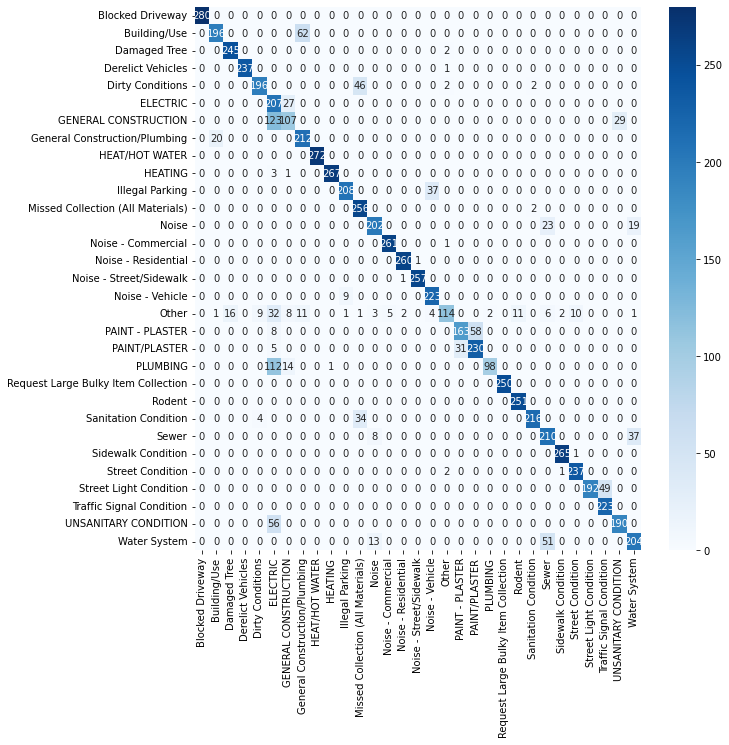

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
c_matrix = confusion_matrix(test_label, test_pred)
df_cm = pd.DataFrame(c_matrix, index = [i for i in label_name],
                  columns = [i for i in label_name])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm,annot=True,cmap='Blues', fmt='g')

In [29]:
import pickle
file_name = "xgb_reg.pkl"
# save
pickle.dump(xgb_model, open(file_name, "wb"))

# # load
# xgb_model_loaded = pickle.load(open(file_name, "rb"))

## Building a Correction Model use most recent data (year 2021-2022)

In this approch we can try to train the model on most recent year's data and potentially use it for a 'correction' model for earlier report <br>

We can select the data by specific time frame and only train on that given data. <br>

Challenges for this approch is that there are potential groud truth type missing in recent years <br>

In [30]:
from sklearn.preprocessing import LabelEncoder

df = df_NYC_dataset
df['Descriptor'].fillna('empty', inplace =True)

#here we fill the missing X,Y coordiante with the average.
fill_x = df['X Coordinate (State Plane)'].mean()
fill_y = df['Y Coordinate (State Plane)'].mean()
df['X Coordinate (State Plane)'].fillna(fill_x,inplace=True)
df['Y Coordinate (State Plane)'].fillna(fill_y,inplace=True)

#building the label column
le = LabelEncoder()
label = le.fit_transform(df['Complaint Type'])
df['label'] = label

#ground truth label
label_name  = list(le.classes_)

df = df.drop(columns=['Complaint Type'])

Here we Select time index 

In [31]:
recent_id = []
time = df["Created Date"]
for i in trange(df.shape[0]):
    if time[i][6:10] == '2022':
        recent_id.append(i)
    elif time[i][6:10] == '2021':
        recent_id.append(i)
    elif time[i][6:10] == '2020':
        recent_id.append(i)
    elif time[i][6:10] == '2019':
        recent_id.append(i)
    else:
        continue

100%|█████████████████████████████████████████| 28866465/28866465 [02:28<00:00, 194960.38it/s]


In [32]:
df_recent = df.iloc[recent_id]
df_sub = df_recent.groupby('label', group_keys=False).apply(lambda x: x.sample(10000,replace=True))

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = df_sub.drop(columns=['Created Date'])
X[['X Coordinate (State Plane)', 'Y Coordinate (State Plane)']] = StandardScaler().fit_transform(df_sub[['X Coordinate (State Plane)', 'Y Coordinate (State Plane)']])

from sklearn.compose import make_column_transformer
column_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False),['Agency','Descriptor','Incident Zip','Location Type','Address Type','City','Resolution Description','Borough']),remainder='passthrough')

X_one_hot = column_transformer.fit_transform(X)

np.random. shuffle(X_one_hot)
data_train = X_one_hot[:,:-2].astype('float32')
data_label = X_one_hot[:,-1].astype('float32')

train, test, train_label, test_label = train_test_split(data_train, data_label, test_size=0.05, random_state=42)

Since there is only 28 classes for the year 2019-2022 , there are missing 3 classes, we need to redo the label encoding

In [34]:
le = LabelEncoder()
label_ = le.fit_transform(data_label )
label_name_  = list(le.classes_)
name = []
for i in range(len(label_name_)):
    name.append(label_name[int(label_name_[i])])
    
train, test, train_label, test_label = train_test_split(data_train, label_, test_size=0.05, random_state=42)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb

#I used RandomizedSearchCV to finetune the params for my xgb_model
xgb_model_recent = xgb.XGBClassifier(n_estimators=300,num_class=28,learning_rate=0.01,
                             min_child_weight = 1,gamma=1,subsample=0.6,colsample_bytree=0.4,max_depth=10)
xgb_model_recent.fit(train,train_label)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_class=28, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

In [36]:
test_pred = xgb_model_recent.predict(test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(test_label, test_pred,target_names=name))

                                     precision    recall  f1-score   support

                   Blocked Driveway       1.00      1.00      1.00       496
                       Building/Use       0.90      0.74      0.81       494
                       Damaged Tree       0.95      0.99      0.97       510
                  Derelict Vehicles       0.98      1.00      0.99       505
                   Dirty Conditions       0.98      0.85      0.91       523
                           ELECTRIC       0.48      0.96      0.64       488
      General Construction/Plumbing       0.76      0.92      0.83       499
                     HEAT/HOT WATER       1.00      1.00      1.00       488
                    Illegal Parking       0.95      0.87      0.90       500
  Missed Collection (All Materials)       0.79      0.99      0.88       510
                              Noise       0.92      0.84      0.88       521
                 Noise - Commercial       0.95      0.98      0.97       46

For only using the recent four year data, we can see the performence is just slightly better, however we are only predicting 28 classes vs the whole dataset 31 classes so it's not a fair comparsion 

We will loss 3 addtional classes if we use this model to correct historical records 

<AxesSubplot:>

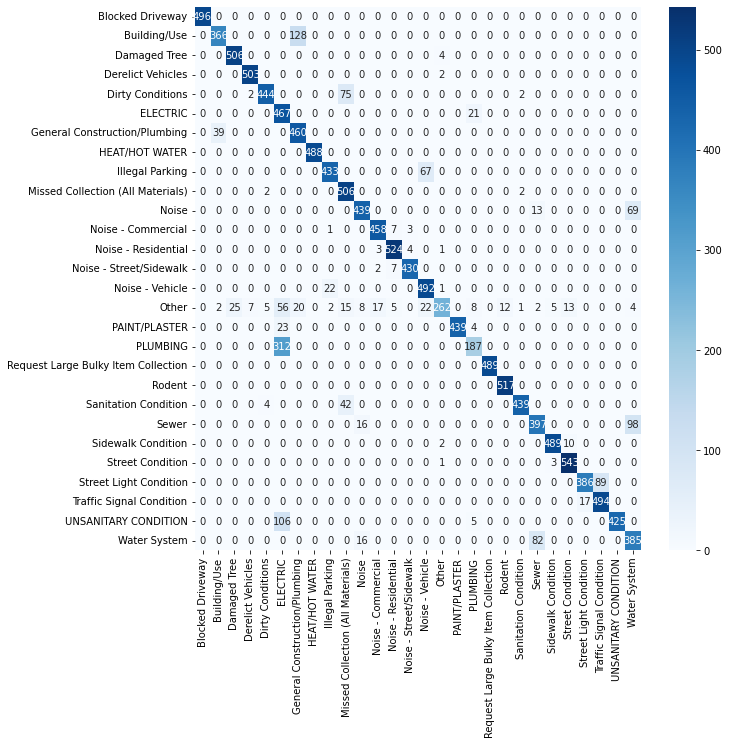

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
c_matrix = confusion_matrix(test_label, test_pred)
df_cm = pd.DataFrame(c_matrix, index = [i for i in name],columns = [i for i in name])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm ,annot=True,cmap='Blues', fmt='g')

# conclusion

The all year model is more sutiable for prediction, with very good accuracy on 31 class prediction. In real dataset the class is very inbalanced and the model is very very well on the more common classes. <br>

The trained only on recent year model face more challenges compares to all year model, with lot of low frequency classes missing. One solution is to subsample those missing classes from earlier year. <br>

Some more ideas I want to explore in the future:

- more in depth feature analysis on highly correlated features.
- try frequency encoding on some of the features.
- use NLP method such as word2vec, we can concat all the description related classes into one and use NLP method to embed the text and learn from the text